In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

#save data file name
fileName = "HospitalNY2015.csv"

#load data file
df = pd.read_csv(fileName)

#get rid of unused columns Payment Typology 2Payment Typology 3Operating Provider License NumberOther Provider License Number
df = df.drop(columns=['Payment Typology 2', 'Payment Typology 3', 'Operating Provider License Number', 'Other Provider License Number'])

#get rid of blank values
df = df.dropna()

#convert cols to numeric values only
df = df.astype({'Length of Stay':'string','Total Charges':'string'})
df["Length of Stay"]=df["Length of Stay"].apply(lambda x:re.sub('[+!@#$]', '', x))
df["Total Charges"]=df["Total Charges"].apply(lambda x:re.sub('[+!@#$]', '', x))

#Convert object data types (length of stay and total charges) to int/float
df[["Length of Stay","Total Charges"]] = df[["Length of Stay","Total Charges"]].apply(pd.to_numeric)

#numerically encode "APR Risk of Mortality"
#create conditions list
conditions = [
    (df["APR Risk of Mortality"] == "Minor"),
    (df["APR Risk of Mortality"] == "Moderate"),
    (df["APR Risk of Mortality"] == "Major")]

#create list of values
values = [1, 2, 3]

#create new col with values assigned based on conditions list
df["APR Risk of Mortality Code"] = np.select(conditions, values)

#CORRELATION HEATMAP
#get data for correlation
dfCorr = df.loc[:, ["Length of Stay","Total Charges", "APR Severity of Illness Code", "APR Risk of Mortality Code"]]

#create correlation map 
corrMap = dfCorr.corr()

#create correlation heatmap
heatmap = sns.heatmap(corrMap, vmin=-1, vmax=1, cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

#save heatmap to img file (png)
plt.savefig('heatmap.png')


In [ ]:
# Descriptive Analysis Function
def descr_stat():
  # Descriptive stats for numerical and ordinal(numerically encoded) parameters of interest
  print(df[['Total Charges', 'Length of Stay', 'APR Severity of Illness Code', 'APR Risk of Mortality Code']].describe())

  # Descriptive stats for categorical parameters of interest
  for items in df[['Age Group','Gender', 'Race', 'Type of Admission', 'Patient Disposition']]:
    print("Frequency table of ", items)
    print(df.value_counts([items]))
    print(    )

descr_stat()

In [ ]:
# Distribution Plots
def distribution_plots():
  import matplotlib.pyplot as plt
  # Gender
  plt.hist(df['Gender'], color='coral')
  plt.xlabel("Gender")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution for Gender")
  plt.show()

  # APR Severity of Illness Code
  plt.hist(df['APR Severity of Illness Code'], color='teal')
  plt.xlabel("Severity of Illness")
  plt.ylabel("Number of Patients (x10^6)")
  plt.xticks([1,2,3,4])
  plt.title("Distribution for Severity of Illness")
  plt.show()

  #Length of Stay
  plt.hist(df['Length of Stay'], color='purple',bins=40)
  plt.xlabel("Length of Stay (days)")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution for Length of Stay")
  plt.show()
 
  # Total Charge
  plt.hist(df['Total Charges'], color='magenta', bins=80)
  plt.xlabel("Total Charges USD (x10^6)")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution for Total Charge")
  plt.show()

  # APR Risk of Mortality
  plt.hist(df['APR Risk of Mortality'], color='chocolate')
  plt.xlabel("Risk of Mortality")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution for Risk of Mortality")
  plt.show()

  # Age group
  plt.hist(df['Age Group'], color='lawngreen')
  plt.xlabel("Age Group")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution for Age Group")
  plt.show()

  # Race
  plt.hist(df['Race'], color='seagreen')
  plt.xlabel("Race")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution by Race")
  plt.show()

  # Type of Admission
  plt.hist(df['Type of Admission'], color='plum')
  plt.xlabel("Type of Admission")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution by Admission Type")
  plt.show()

  # Patient Disposition
  plt.hist(df['Patient Disposition'], color='gold')
  plt.xlabel("Patient Disposition")
  plt.ylabel("Number of Patients (x10^6)")
  plt.title("Distribution by Patient Disposition")
  plt.xticks(rotation=90)
  plt.show()



distribution_plots()




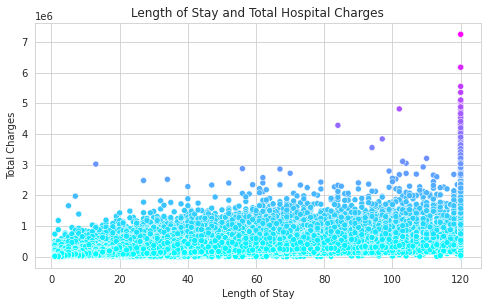

The heatmap showed a correlation coefficient of 0.71 and the scatterplot also shows that the total hospital charges is positively associated with the length of stay at the hospital.


In [ ]:
# Scatterplots to show relationship between different parameters and total charges
# Scatterplot for Length of Stay and Total Cost
def scat_lengthOfStay():
  #importing libraries
  import matplotlib.pyplot as plt
  import seaborn as sns

  #setting sns style
  sns.set_style('whitegrid')

  #Creating plot
  plt.figure(figsize=(8,4.5))
  sns.scatterplot(data=df, x='Length of Stay', y='Total Charges', hue='Total Charges', palette= 'cool', legend=False)
  plt.title("Length of Stay and Total Hospital Charges")
  plt.show()

  #Interpretation/Diagnostic
  print("The heatmap showed a correlation coefficient of 0.71 and the scatterplot also shows that the total hospital charges is positively associated with the length of stay at the hospital.")

scat_lengthOfStay()


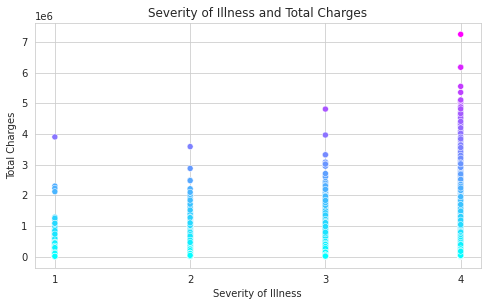

The heatmap showed a correlation coefficient of 0.33 and the scatterplot also shows that the illness severity is a weak, but positive driving factor of Total Hospital charges.


In [ ]:
# Scatterplot for APR Severity of Illness coded and Total Charges
def scat_SeverityOfIllness():
  #importing libraries
  import matplotlib.pyplot as plt
  import seaborn as sns
  # Creating plot
  plt.figure(figsize=(8,4.5))
  sns.scatterplot(data=df, x='APR Severity of Illness Code', y='Total Charges', hue='Total Charges', palette='cool', legend=False)
  plt.title("Severity of Illness and Total Charges")
  plt.xlabel("Severity of Illness")
  plt.xticks([1,2,3,4])
  plt.show()

  #Interpretation/Diagnostic
  print("The heatmap showed a correlation coefficient of 0.33 and the scatterplot also shows that the illness severity is a weak, but positive driving factor of Total Hospital charges.")

scat_SeverityOfIllness()



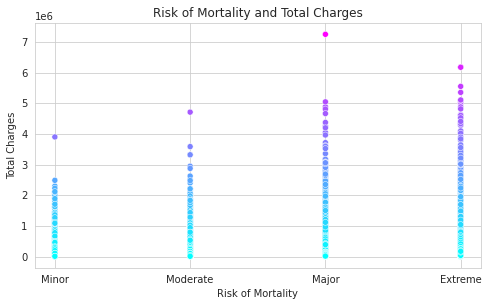

The heatmap showed a correlation coefficient of 0.037 and the scatterplot also shows that the risk of mortality is not a major driving factor of total charges.


In [ ]:
# Scatterplot for Risk of Mortality and Total Charge
def scat_Mortality():
  #importing libraries
  import matplotlib.pyplot as plt
  import seaborn as sns
  # Creating plot
  plt.figure(figsize=(8,4.5))
  sns.scatterplot(data=df, x='APR Risk of Mortality', y='Total Charges', hue='Total Charges', palette='cool', legend=False)
  plt.title("Risk of Mortality and Total Charges")
  plt.xlabel("Risk of Mortality")
  plt.show()

  #Interpretation/Diagnostic
  print("The heatmap showed a correlation coefficient of 0.037 and the scatterplot also shows that the risk of mortality is not a major driving factor of total charges.")


scat_Mortality()


In [ ]:
# Multilinear Regression 

def mlr_model():
  #import library
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  import numpy as np

  # Converting pandas df to numpy arrays
  X=df[['Length of Stay','APR Severity of Illness Code','APR Risk of Mortality Code']].to_numpy()
  y = df['Total Charges'].to_numpy()

  # Setting up training model
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
  lin_regr = LinearRegression()
  lin_regr.fit(X=X_train, y=y_train)

  # Getting coefficient and intercept of the linear equation
  print("Intercept: ", lin_regr.intercept_)
  print("Coefficients (Length of Stay, APR Severity of Illness, APR Risk of Mortality):", lin_regr.coef_ )

  # Testing the model
  predicted = lin_regr.predict(X_test)
  expected = y_test

  # Setting up series and dataframe for Expected vs. Predicted total charges
  df2 = pd.DataFrame()
  df2['Predicted'] = pd.Series(predicted)
  df2['Expected'] = pd.Series(expected)

  # Regression model metrics
  from sklearn import metrics
  print("r2 of regression model: ", metrics.r2_score(expected, predicted))

  #Interpretation
  print("Diagnostic features of Regression Model: shows the level of effect that Length of Stay, Illness Severity and Mortality risk has on the total hospital charge.")
  print("Predictive Analysis: r2 score between predicted and expected is 0.508 meaning that this model can predict the total hospital charges based on these selected parameters 50.8% of the time.")

mlr_model()




Intercept:  -7981.620931658545
Coefficients (Length of Stay, APR Severity of Illness, APR Risk of Mortality): [ 6629.23131745 10233.06561997 -3957.88181294]
r2 of regression model:  0.5081913066677399
Diagnostic features of Regression Model: shows the level of effect that Length of Stay, Illness Severity and Mortality risk has on the total hospital charge.
Predictive Analysis: r2 score between predicted and expected is 0.508 meaning that this model can predict the total hospital charges based on these selected parameters 50.8% of the time.


In [ ]:
#Multinomial NAIVE BAYES Classifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#feature encoding - numerical values assigned to categorical values
encoder = preprocessing.LabelEncoder()

labels = encoder.fit_transform(df["Payment Typology 1"])

ageGroupEncoded = encoder.fit_transform(df["Age Group"])
genderEncoded = encoder.fit_transform(df["Gender"])
raceEncoded = encoder.fit_transform(df["Race"])
admTypeEncoded = encoder.fit_transform(df["Type of Admission"])
patientDispEncoded = encoder.fit_transform(df["Patient Disposition"])
print(labels)

#consolidate features for NB classification 
featureList = list(zip(ageGroupEncoded, genderEncoded, raceEncoded, admTypeEncoded, patientDispEncoded))
features  = pd.DataFrame(featureList, columns = ["Age Group", "Gender", "Race", "Type of Admission", "Patient Disposition"])

#split data into train and test sets (30% test, 70% train)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=109) 

#create gaussian NB model
model = GaussianNB()

#fit train data to model
model.fit(X_train, y_train)

#predict labels using test data input
y_pred = model.predict(X_test)

#evaluate model - find accuracy
modelAccuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", modelAccuracy)

#result interpretation: since the model's accuracy is below 70%, we can conclude that it is relatively weak
#and therefore inaccuracte in predicting the payment type
#this issue could potentially be rectified by adding more features to the dataset or using an alternative classifier (ex: random forest)


[4 4 4 ... 4 5 8]
Accuracy: 0.5680514383057693
[5 5 4 ... 7 4 0]
